# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

In [4]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


In [6]:
df = df0.merge(nyc_preds_means, left_index = True, right_index = True)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
df1 = df[df["payment_type"]==1]

In [9]:
1.1 + 2.2

3.3000000000000003

In [10]:
df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

In [11]:
df1["generous"] = (df1["tip_percent"] >= 0.2)
df1["generous"] = df1["generous"].astype(int)
print(df1["generous"].head())

0    1
1    1
2    0
3    1
5    1
Name: generous, dtype: int64


In [12]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [13]:
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

In [14]:

df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

In [15]:
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

In [16]:
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['am_rush'].head()

0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

Write functions to convert the three remaining columns and apply them to their respective series.

In [17]:
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [18]:
df1['daytime'] = df1.apply(daytime, axis=1)

In [19]:
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [20]:
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

In [21]:
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [22]:
df1['nighttime'] = df1.apply(nighttime, axis=1)

In [23]:
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [24]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,0,0,1,mar


In [25]:
df1 = df1.drop(['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type','fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge', 'total_amount', 'tip_percent'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


In [26]:
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

for col in cols_to_str:
    df1[col] = df1[col].astype('str')

In [27]:
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: bool(338), float64(3), int64(6)
memory usage: 6.1 MB


In [28]:
df2['generous'].value_counts(normalize=True)

generous
1    0.526368
0    0.473632
Name: proportion, dtype: float64

In [29]:

y = df2["generous"]
X = df2.drop("generous", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [30]:
RFC = RandomForestClassifier()
CV_Params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }
scoring = ['accuracy', 'precision', 'recall', 'f1']
RFC1 = GridSearchCV(RFC, CV_Params, scoring = scoring, cv = 5, refit = "f1")

In [32]:
RFC1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [33]:
import pickle 

path = '/home/jovyan/work/'

In [34]:
def write_pickle(path, model_object, save_name:str):

    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [35]:
def read_pickle(path, saved_model_name:str):
    
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [36]:
# Examine best score
#==> ENTER YOUR CODE HERE
RFC1.best_score_

0.7156233836198134

In [38]:

RFC1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [39]:
def make_results(model_name:str, model_object, metric:str):

    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }


    cv_results = pd.DataFrame(model_object.cv_results_)

 
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

 
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [40]:

results = make_results('RF CV', RFC1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.67771,0.758245,0.715623,0.682852


In [41]:

RFC_preds = RFC1.best_estimator_.predict(x_test)

In [45]:
def get_test_scores(model_name:str, preds, y_test_data):
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [46]:
RFC_test_scores = get_test_scores('RF test', RFC_preds, y_test)
results = pd.concat([results, RFC_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.677710,0.758245,0.715623,0.682852
0,RF test,0.676534,0.782203,0.725541,0.688503


In [47]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }
scoring = ['accuracy', 'precision', 'recall', 'f1']
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [48]:
%%time

xgb1.fit(x_train, y_train)

CPU times: user 21.8 s, sys: 108 ms, total: 21.9 s
Wall time: 11.5 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [49]:

xgb1.best_score_

0.6955124635485908

In [50]:

xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [51]:
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.677710,0.758245,0.715623,0.682852
0,RF test,0.676534,0.782203,0.725541,0.688503
0,XGB CV,0.669726,0.723553,0.695512,0.666557


In [53]:
# predicting for test data
xgb_preds = xgb1.best_estimator_.predict(x_test)

In [54]:
# Getting scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.677710,0.758245,0.715623,0.682852
0,RF test,0.676534,0.782203,0.725541,0.688503
0,XGB CV,0.669726,0.723553,0.695512,0.666557
0,XGB test,0.677219,0.745488,0.709716,0.679004


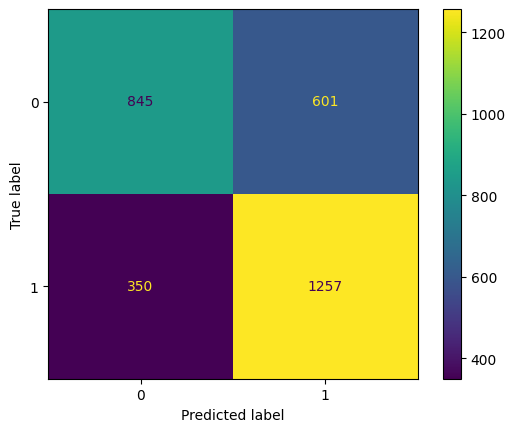

In [56]:
# Generating array of values for confusion matrix
cm = metrics.confusion_matrix(y_test, RFC_preds, labels=RFC1.classes_)

# Plotting confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=RFC1.classes_, 
                             )
disp.plot(values_format='');

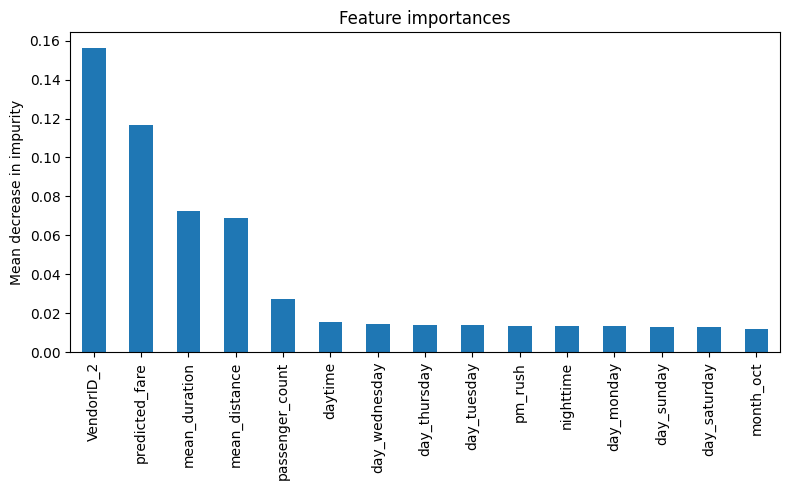

In [59]:
#Plotting Feature Importances
importances = RFC1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=x_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  

Yes, this is model performs acceptably. Its F1 score was 0.7255 and it had an overall accuracy of 0.6885. It correctly identified ~78% of the actual responders in the test set, which is 48% better than a random guess. It may be worthwhile to test the model with a select group of taxi drivers to get feedback.

2. **What was your model doing? Can you explain how it was making predictions?**   

Unfortunately, random forest is not the most transparent machine learning algorithm. We know that VendorID, predicted_fare, mean_duration, and mean_distance are the most important features, but we don't know how they influence tipping. This would require further exploration. It is interesting that VendorID is the most predictive feature. This seems to indicate that one of the two vendors tends to attract more generous customers. It may be worth performing statistical tests on the different vendors to examine this further.

3. **Are there new features that you can engineer that might improve model performance?** 

There are almost always additional features that can be engineered, but hopefully the most obvious ones were generated during the first round of modeling. In our case, we could try creating three new columns that indicate if the trip distance is short, medium, or far. We could also engineer a column that gives a ratio that represents (the amount of money from the fare amount to the nearest higher multiple of $5) / fare amount. For example, if the fare were $12, the value in this column would be 0.25, because $12 to the nearest higher multiple of $5 ($15) is $3, and $3 divided by $12 is 0.25. The intuition for this feature is that people might be likely to simply round up their tip, so journeys with fares with values just under a multiple of $5 may have lower tip percentages than those with fare values just over a multiple of $5. We could also do the same thing for fares to the nearest $10.
𝑟𝑜𝑢𝑛𝑑5_𝑟𝑎𝑡𝑖𝑜=𝑎𝑚𝑜𝑢𝑛𝑡 𝑜𝑓 𝑚𝑜𝑛𝑒𝑦 𝑓𝑟𝑜𝑚 𝑡ℎ𝑒 𝑓𝑎𝑟𝑒 𝑎𝑚𝑜𝑢𝑛𝑡 𝑡𝑜 𝑡ℎ𝑒 𝑛𝑒𝑎𝑟𝑒𝑠𝑡 ℎ𝑖𝑔ℎ𝑒𝑟 𝑚𝑢𝑙𝑡𝑖𝑝𝑙𝑒 𝑜𝑓 $5𝑓𝑎𝑟𝑒 𝑎𝑚𝑜𝑢𝑛𝑡

4. **What features would you want to have that would likely improve the performance of your model?**   

It would probably be very helpful to have past tipping behavior for each customer. It would also be valuable to have accurate tip values for customers who pay with cash. It would be helpful to have a lot more data. With enough data, we could create a unique feature for each pickup/dropoff combination.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.